<a href="https://colab.research.google.com/github/i-ganza007/-Time-Series-Forecasting/blob/main/_TimeSeries1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [3]:
train.head()

,No,DEWP,TEMP,PRES,Iws,Is,Ir,datetime,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
0,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,2010-01-01 00:00:00,1.448138,-0.732019,-0.522096,NaN
1,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,2010-01-01 01:00:00,1.448138,-0.732019,-0.522096,NaN
2,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,2010-01-01 02:00:00,1.448138,-0.732019,-0.522096,NaN
3,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,2010-01-01 03:00:00,1.448138,-0.732019,-0.522096,NaN
4,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,2010-01-01 04:00:00,1.448138,-0.732019,-0.522096,NaN


In [4]:
test.head()

,No,DEWP,TEMP,PRES,Iws,Is,Ir,datetime,cbwd_NW,cbwd_SE,cbwd_cv
0,30677,1.190496,0.701029,-2.186052,-0.003982,-0.069353,-0.137667,2013-07-02 04:00:00,1.448138,-0.732019,-0.522096
1,30678,1.121211,0.619051,-2.186052,0.031811,-0.069353,-0.137667,2013-07-02 05:00:00,1.448138,-0.732019,-0.522096
2,30679,1.190496,0.783006,-2.186052,0.094398,-0.069353,-0.137667,2013-07-02 06:00:00,1.448138,-0.732019,-0.522096
3,30680,1.190496,0.946961,-2.088668,0.174782,-0.069353,-0.137667,2013-07-02 07:00:00,1.448138,-0.732019,-0.522096
4,30681,1.190496,1.192893,-1.991283,0.210575,-0.069353,-0.137667,2013-07-02 08:00:00,1.448138,-0.732019,-0.522096


In [5]:
train.describe()

,No,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
count,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000,28755.000000
mean,15338.500000,-0.029431,-0.062712,0.013612,0.030542,0.016992,0.011253,0.016193,0.005833,-0.025008,100.793427
std,8855.542765,0.994087,1.015193,1.008991,1.018337,1.087278,1.063811,1.006001,1.001847,0.982122,93.144433
min,1.000000,-2.135153,-2.578070,-2.380821,-0.468688,-0.069353,-0.137667,-0.690542,-0.732019,-0.522096,0.000000
25%,7669.750000,-0.888034,-0.938521,-0.822670,-0.441894,-0.069353,-0.137667,-0.690542,-0.732019,-0.522096,29.000000
50%,15338.500000,-0.056622,0.045209,-0.043595,-0.352512,-0.069353,-0.137667,-0.690542,-0.732019,-0.522096,75.000000
75%,23007.250000,0.913358,0.864984,0.832865,0.005216,-0.069353,-0.137667,1.448138,1.366085,-0.522096,142.000000
max,30676.000000,1.814055,2.340578,2.877939,11.231956,35.439859,25.288745,1.448138,1.366085,1.915355,994.000000


In [6]:
train.isna().sum()

,0
No,0
DEWP,0
TEMP,0
PRES,0
Iws,0
Is,0
Ir,0
datetime,0
cbwd_NW,0
cbwd_SE,0


In [7]:
test.isna().sum()

,0
No,0
DEWP,0
TEMP,0
PRES,0
Iws,0
Is,0
Ir,0
datetime,0
cbwd_NW,0
cbwd_SE,0


In [8]:
train.columns.isin(['pm2.5'])

array([False, False, False, False, False, False, False, False, False,
       False, False,  True])

In [9]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])
train.set_index('datetime', inplace=True)
# val.set_index('datetime', inplace=True)
test.set_index('datetime', inplace=True)

In [10]:
train.head()

,No,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
datetime,,,,,,,,,,,
2010-01-01 00:00:00,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN
2010-01-01 01:00:00,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN
2010-01-01 02:00:00,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN
2010-01-01 03:00:00,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN
2010-01-01 04:00:00,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN


In [11]:
test.head()

,No,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_cv
datetime,,,,,,,,,,
2013-07-02 04:00:00,30677,1.190496,0.701029,-2.186052,-0.003982,-0.069353,-0.137667,1.448138,-0.732019,-0.522096
2013-07-02 05:00:00,30678,1.121211,0.619051,-2.186052,0.031811,-0.069353,-0.137667,1.448138,-0.732019,-0.522096
2013-07-02 06:00:00,30679,1.190496,0.783006,-2.186052,0.094398,-0.069353,-0.137667,1.448138,-0.732019,-0.522096
2013-07-02 07:00:00,30680,1.190496,0.946961,-2.088668,0.174782,-0.069353,-0.137667,1.448138,-0.732019,-0.522096
2013-07-02 08:00:00,30681,1.190496,1.192893,-1.991283,0.210575,-0.069353,-0.137667,1.448138,-0.732019,-0.522096


In [12]:
train.fillna(train.mean(), inplace=True)


In [13]:
X_train = train.drop(['pm2.5', 'No'], axis=1)
y_train = train['pm2.5']


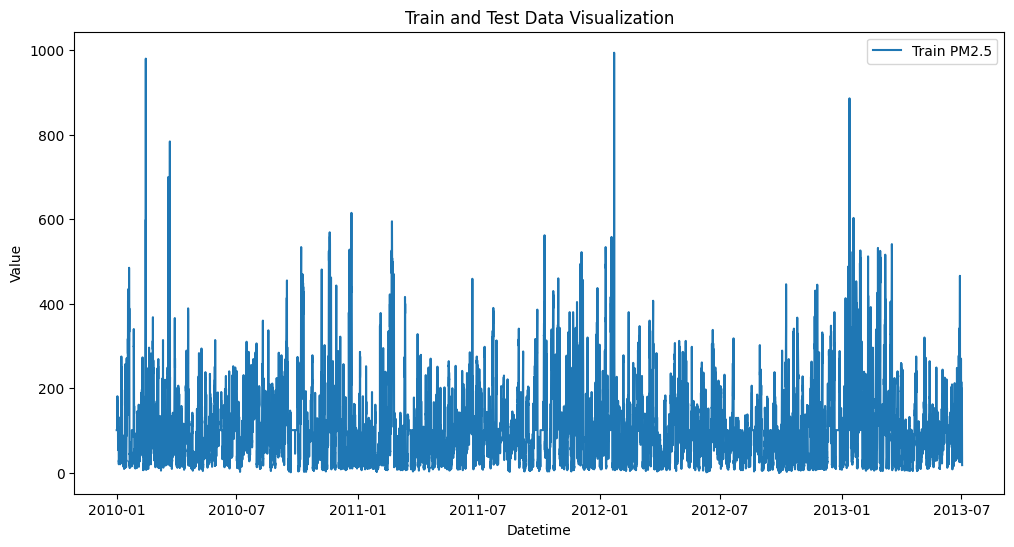

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['pm2.5'], label='Train PM2.5')
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('Train and Test Data Visualization')
plt.legend()
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standard_scaled = scaler.fit_transform(X_train)
standard_scaled = pd.DataFrame(standard_scaled, columns=X_train.columns, index=X_train.index)
standard_scaled

,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_cv
datetime,,,,,,,,,
2010-01-01 00:00:00,-1.560701,-1.831739,0.425893,-0.463936,-0.079415,-0.139990,1.423426,-0.736504,-0.506146
2010-01-01 01:00:00,-1.560701,-1.912491,0.329375,-0.402474,-0.079415,-0.139990,1.423426,-0.736504,-0.506146
2010-01-01 02:00:00,-1.560701,-1.831739,0.232857,-0.367326,-0.079415,-0.139990,1.423426,-0.736504,-0.506146
2010-01-01 03:00:00,-1.560701,-2.073995,0.232857,-0.305864,-0.079415,-0.139990,1.423426,-0.736504,-0.506146
2010-01-01 04:00:00,-1.491003,-1.912491,0.136339,-0.244403,-0.079415,-0.139990,1.423426,-0.736504,-0.506146
...,...,...,...,...,...,...,...,...,...
2013-07-01 23:00:00,1.505994,0.994579,-2.083580,-0.437623,-0.079415,2.515748,-0.702530,-0.736504,-0.506146
2013-07-02 00:00:00,1.366599,0.913827,-2.180099,-0.402474,-0.079415,3.179683,1.423426,-0.736504,-0.506146
2013-07-02 01:00:00,1.296901,0.752323,-2.083580,-0.288388,-0.079415,3.843617,1.423426,-0.736504,-0.506146


In [16]:
y_train_scaled = scaler.fit_transform(train['pm2.5'].values.reshape(-1,1))
y_train_df = pd.DataFrame(y_train_scaled, columns=['pm2.5'], index=train.index)
y_train_scaled

array([[-1.57584510e-16],
       [-1.57584510e-16],
       [-1.57584510e-16],
       ...,
       [-7.62851969e-01],
       [-9.07009281e-01],
       [-9.18098305e-01]])

In [17]:
standard_scaled.shape

(30676, 9)

In [18]:
standard_scaled.head()

,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_cv
datetime,,,,,,,,,
2010-01-01 00:00:00,-1.560701,-1.831739,0.425893,-0.463936,-0.079415,-0.13999,1.423426,-0.736504,-0.506146
2010-01-01 01:00:00,-1.560701,-1.912491,0.329375,-0.402474,-0.079415,-0.13999,1.423426,-0.736504,-0.506146
2010-01-01 02:00:00,-1.560701,-1.831739,0.232857,-0.367326,-0.079415,-0.13999,1.423426,-0.736504,-0.506146
2010-01-01 03:00:00,-1.560701,-2.073995,0.232857,-0.305864,-0.079415,-0.13999,1.423426,-0.736504,-0.506146
2010-01-01 04:00:00,-1.491003,-1.912491,0.136339,-0.244403,-0.079415,-0.13999,1.423426,-0.736504,-0.506146


In [19]:
window = 5
features = standard_scaled.shape[1]
samples = standard_scaled.shape[0] - window

In [37]:
def create_sequences(data_features, data_target=None, window_size=1):
    X, y = [], []
    for i in range(len(data_features) - window_size):
        X.append(data_features.iloc[i:(i + window_size)].values)
        if data_target is not None:
            y.append(data_target.iloc[i + window_size, 0])
    if data_target is not None:
      return np.array(X), np.array(y)
    else:
      return np.array(X)

X, y = create_sequences(standard_scaled, y_train_df, window)
X[:8]

array([[[-1.56070054, -1.83173882,  0.42589344, -0.46393574,
         -0.07941539, -0.13998984,  1.4234261 , -0.73650367,
         -0.50614569],
        [-1.56070054, -1.91249075,  0.32937521, -0.40247436,
         -0.07941539, -0.13998984,  1.4234261 , -0.73650367,
         -0.50614569],
        [-1.56070054, -1.83173882,  0.23285698, -0.36732551,
         -0.07941539, -0.13998984,  1.4234261 , -0.73650367,
         -0.50614569],
        [-1.56070054, -2.0739946 ,  0.23285698, -0.30586413,
         -0.07941539, -0.13998984,  1.4234261 , -0.73650367,
         -0.50614569],
        [-1.49100293, -1.91249075,  0.13633876, -0.24440275,
         -0.07941539, -0.13998984,  1.4234261 , -0.73650367,
         -0.50614569]],

       [[-1.56070054, -1.91249075,  0.32937521, -0.40247436,
         -0.07941539, -0.13998984,  1.4234261 , -0.73650367,
         -0.50614569],
        [-1.56070054, -1.83173882,  0.23285698, -0.36732551,
         -0.07941539, -0.13998984,  1.4234261 , -0.73650367,
      

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
x_train.shape

(21469, 5, 9)

In [23]:
x_test[0:3]

array([[[-0.4455389 , -1.18572341,  0.42589344, -0.46393574,
         -0.07941539, -0.13998984, -0.70253033, -0.73650367,
         -0.50614569],
        [-0.4455389 , -1.18572341,  0.42589344, -0.4376232 ,
         -0.07941539, -0.13998984,  1.4234261 , -0.73650367,
         -0.50614569],
        [-0.4455389 , -1.10497149,  0.52241166, -0.40247436,
         -0.07941539, -0.13998984,  1.4234261 , -0.73650367,
         -0.50614569],
        [-0.4455389 , -0.94346764,  0.52241166, -0.36732551,
         -0.07941539, -0.13998984,  1.4234261 , -0.73650367,
         -0.50614569],
        [-0.4455389 , -0.86271571,  0.42589344, -0.33217667,
         -0.07941539, -0.13998984,  1.4234261 , -0.73650367,
         -0.50614569]],

       [[-0.93342212, -0.29745223,  0.81196634, -0.4287869 ,
         -0.07941539, -0.13998984, -0.70253033,  1.35776649,
         -0.50614569],
        [-0.93342212, -0.2167003 ,  0.61892989, -0.39363805,
         -0.07941539, -0.13998984, -0.70253033,  1.35776649,
      

In [24]:
# from sklearn.metrics import root_mean_squared_error

# # Calculate RMSE on the unscaled training validation set predictions
# rmse_unscaled = root_mean_squared_error(y_test_unscaled, y_pred_unscaled)

# print(f"RMSE on unscaled training validation data: {rmse_unscaled}")

In [25]:
models = Sequential([
    tf.keras.layers.LSTM(50,activation='relu',input_shape=(window,features), return_sequences=False),
    tf.keras.layers.Dense(1)
])
models.compile(optimizer='adam',loss='mse')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
models.fit(x_train, y_train, epochs=10, batch_size=16, verbose=1)

Epoch 1/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.6903
Epoch 2/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.6173
Epoch 3/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.6118
Epoch 4/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.5786
Epoch 5/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.5706
Epoch 6/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.5845
Epoch 7/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.5669
Epoch 8/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.5472
Epoch 9/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.5434
Epoch 10/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.5532


In [27]:
# RMSE : SCaled Data
from sklearn.metrics import root_mean_squared_error
y_pred = models.predict(x_test)
rmse = root_mean_squared_error(y_test, y_pred)
rmse


288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.7441395054814858

In [28]:
test_data = test.drop('No', axis=1)
test_data_scaled = scaler.fit_transform(test_data)
test_data_df = pd.DataFrame(test_data_scaled,columns=test_data.columns, index=test_data.index)
test_data_df

,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_cv
datetime,,,,,,,,,
2013-07-02 04:00:00,1.110314,0.585350,-2.202744,0.070661,-0.039253,-0.133945,1.508758,-0.721598,-0.559078
2013-07-02 05:00:00,1.041740,0.498845,-2.202744,0.108255,-0.039253,-0.133945,1.508758,-0.721598,-0.559078
2013-07-02 06:00:00,1.110314,0.671855,-2.202744,0.173992,-0.039253,-0.133945,1.508758,-0.721598,-0.559078
2013-07-02 07:00:00,1.110314,0.844866,-2.103169,0.258421,-0.039253,-0.133945,1.508758,-0.721598,-0.559078
2013-07-02 08:00:00,1.110314,1.104381,-2.003594,0.296015,-0.039253,-0.133945,1.508758,-0.721598,-0.559078
...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,-1.769759,-1.404267,1.780241,4.445001,-0.039253,-0.133945,1.508758,-0.721598,-0.559078
2014-12-31 20:00:00,-1.701186,-1.490772,1.780241,4.567024,-0.039253,-0.133945,1.508758,-0.721598,-0.559078
2014-12-31 21:00:00,-1.701186,-1.490772,1.780241,4.670355,-0.039253,-0.133945,1.508758,-0.721598,-0.559078


In [29]:
test_data_df.shape

(13148, 9)

In [40]:
X_test_scaled = create_sequences(test_data_df, window_size=window)
X_test_scaled

array([[[ 1.11031366,  0.58535029, -2.20274371, ...,  1.50875838,
         -0.72159768, -0.55907838],
        [ 1.04174049,  0.49884519, -2.20274371, ...,  1.50875838,
         -0.72159768, -0.55907838],
        [ 1.11031366,  0.67185538, -2.20274371, ...,  1.50875838,
         -0.72159768, -0.55907838],
        [ 1.11031366,  0.84486558, -2.10316909, ...,  1.50875838,
         -0.72159768, -0.55907838],
        [ 1.11031366,  1.10438087, -2.00359448, ...,  1.50875838,
         -0.72159768, -0.55907838]],

       [[ 1.04174049,  0.49884519, -2.20274371, ...,  1.50875838,
         -0.72159768, -0.55907838],
        [ 1.11031366,  0.67185538, -2.20274371, ...,  1.50875838,
         -0.72159768, -0.55907838],
        [ 1.11031366,  0.84486558, -2.10316909, ...,  1.50875838,
         -0.72159768, -0.55907838],
        [ 1.11031366,  1.10438087, -2.00359448, ...,  1.50875838,
         -0.72159768, -0.55907838],
        [ 1.11031366,  1.19088597, -2.00359448, ...,  1.50875838,
         -0.72

In [42]:
test_y_pred_scaled = models.predict(X_test_scaled)
test_y_pred_scaled

411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[-0.75785977],
       [-0.75605214],
       [-0.76854867],
       ...,
       [-0.8490322 ],
       [-0.85162914],
       [-0.8420214 ]], dtype=float32)

In [45]:
# Save the results to a new CSV file
test_predictions_df.to_csv('#timeseries1.csv')

In [44]:
y_train_scaler = StandardScaler()
y_train_scaler.fit(y_train.reshape(-1,1))
y_pred_unscaled = y_train_scaler.inverse_transform(test_y_pred_scaled)

test_predictions_df = pd.DataFrame(y_pred_unscaled, columns=['pm2.5'])

test_predictions_df.index = test_data_df.index[window:]

In [57]:
test_predictions_df['datetime'] = test_predictions_df.index
test_predictions_df.drop('datetime', axis=1, inplace=True)
test_predictions_df.index.name = 'rowId'
test_predictions_df

,pm2.5
rowId,
2013-07-02 09:00:00,-0.758018
2013-07-02 10:00:00,-0.756211
2013-07-02 11:00:00,-0.768703
2013-07-02 12:00:00,-0.762237
2013-07-02 13:00:00,-0.761320
...,...
2014-12-31 19:00:00,-0.860151
2014-12-31 20:00:00,-0.878440
2014-12-31 21:00:00,-0.849153


In [58]:
test_predictions_df.to_csv('#timeseries1.csv')